## 서울시 서대문구에서 치킨집이 가장 많은 동은?

### 자료 출처
- 데이터 다운로드 : LOCALDATA 웹 사이트 
- http://www.localdata.kr/
- 지방자치단체에서 인/허가한 업종별 데이터 제공
- 문화, 체육, 관광, 식품 등 11가지 분야에 걸쳐 다양한 데이터 검색 가능
- 회원 가입 절차를 별도로 거치지 않고도 공공데이터 다운로드 할 수 있음


In [1]:
# 필요 모듈 import 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline


In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


- UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 1: invalid start byte

- 한글처리 방식 (cp949)

-  DtypeWarning: Columns (22,27,39,41,44,45) have mixed types. Specify dtype option on import or set low_memory=False.

In [3]:
# 데이터 읽어오기
data = pd.read_csv('./Data/서울특별시_일반음식점.csv',encoding = 'cp949',low_memory=False)

In [4]:
data.head(2)
data.tail(2)

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
472913,472914,일반음식점,07_24_04_P,3150000,3150000-101-2021-00072,20210203,NaN,3,폐업,2,...,0.0,NaN,0.0,0,N,75.60,NaN,NaN,NaN,NaN
472914,472915,일반음식점,07_24_04_P,3130000,3130000-101-2020-01013,20201208,NaN,3,폐업,2,...,0.0,NaN,0.0,0,N,22.75,NaN,NaN,NaN,NaN


In [5]:
# 데이터 개요 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472915 entries, 0 to 472914
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           472915 non-null  int64  
 1   개방서비스명       472915 non-null  object 
 2   개방서비스아이디     472915 non-null  object 
 3   개방자치단체코드     472915 non-null  int64  
 4   관리번호         472915 non-null  object 
 5   인허가일자        472915 non-null  int64  
 6   인허가취소일자      0 non-null       float64
 7   영업상태구분코드     472915 non-null  int64  
 8   영업상태명        472915 non-null  object 
 9   상세영업상태코드     472915 non-null  int64  
 10  상세영업상태명      472915 non-null  object 
 11  폐업일자         348707 non-null  float64
 12  휴업시작일자       0 non-null       float64
 13  휴업종료일자       0 non-null       float64
 14  재개업일자        0 non-null       float64
 15  소재지전화        327325 non-null  object 
 16  소재지면적        439015 non-null  object 
 17  소재지우편번호      472670 non-null  float64
 18  소재지전체주소      472678 non-

In [6]:
# 문자열.contains(문자열1) - 문자열안에 문자열1이 포함되어 있는지의 여부
# 문자열이 아닌 nan에 대입하면 에러 발생 할 수 있으므로 na = False 파라미터 설정해야 함

data.위생업태명.str.contains('통닭|치킨', na = False)

0         False
1         False
2         False
3         False
4         False
          ...  
472910    False
472911    False
472912    False
472913    False
472914    False
Name: 위생업태명, Length: 472915, dtype: bool

In [7]:
# 필요한 컬럼만 추출 
# set --> 집합 자료형을 처리하는 함수, 2개 이상 동일한 데이터 있으면 1개만 
set(data.위생업태명.values)
set(data.위생업태명[data.위생업태명.str.contains('통닭|치킨', na = False)])

{'통닭(치킨)', '호프/통닭'}

In [8]:
# 현재 영업중인 경우 영업상태명 확인

set(data.영업상태명)

{'영업/정상', '폐업'}

In [9]:
# 영업상태명이 영업/정상 이고 위생업태명이 {'통닭(치킨)' 이거나 '호프/통닭'} 
# 인 data를 추출 (조건 인덱싱)

# 시리즈 함수 .isin([데이터1,데이터2...]) 
# 시리즈 원소가 []안의 데이터 1개와 일치하면 True
(data.영업상태명=='영업/정상') & data.위생업태명.isin(['호프/통닭','통닭(치킨)'])

0         False
1         False
2         False
3         False
4         False
          ...  
472910    False
472911    False
472912    False
472913    False
472914    False
Length: 472915, dtype: bool

In [10]:
data_fin = data[(data.영업상태명=='영업/정상') & data.위생업태명.isin(['호프/통닭','통닭(치킨)'])]

In [11]:
data_fin.head()
data_fin.tail()

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
124130,124131,일반음식점,07_24_04_P,3120000,3120000-101-2021-00031,20210122,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,49.34,NaN,NaN,NaN,NaN
124151,124152,일반음식점,07_24_04_P,3160000,3160000-101-2020-00384,20201208,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,33.00,NaN,NaN,NaN,NaN
124171,124172,일반음식점,07_24_04_P,3200000,3200000-101-2020-00626,20201209,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,62.80,NaN,NaN,NaN,NaN
124193,124194,일반음식점,07_24_04_P,3060000,3060000-101-2021-00028,20210203,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,53.84,NaN,NaN,NaN,NaN
124203,124204,일반음식점,07_24_04_P,3080000,3080000-101-2021-00015,20210122,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,40.00,NaN,NaN,NaN,NaN


In [12]:
# 위생업태명 확인 
data_fin.위생업태명.head()
set(data_fin.위생업태명)

{'통닭(치킨)', '호프/통닭'}

In [13]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13110 entries, 30 to 124203
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           13110 non-null  int64  
 1   개방서비스명       13110 non-null  object 
 2   개방서비스아이디     13110 non-null  object 
 3   개방자치단체코드     13110 non-null  int64  
 4   관리번호         13110 non-null  object 
 5   인허가일자        13110 non-null  int64  
 6   인허가취소일자      0 non-null      float64
 7   영업상태구분코드     13110 non-null  int64  
 8   영업상태명        13110 non-null  object 
 9   상세영업상태코드     13110 non-null  int64  
 10  상세영업상태명      13110 non-null  object 
 11  폐업일자         0 non-null      float64
 12  휴업시작일자       0 non-null      float64
 13  휴업종료일자       0 non-null      float64
 14  재개업일자        0 non-null      float64
 15  소재지전화        6536 non-null   object 
 16  소재지면적        12677 non-null  object 
 17  소재지우편번호      13103 non-null  float64
 18  소재지전체주소      13103 non-null  object 
 19  도로

In [14]:
# 서대문구 데이터만 추출
# 서대문구 각 동에 치킨집이 몇개나 있나?
# 필요 컬럼(소재지 전체 주소, 위생업태명)

data_fin = data_fin[['소재지전체주소','위생업태명']]
data_fin.head()
# data_fin df는 서울시 치킨집 주소 

,소재지전체주소,위생업태명
30,서울특별시 은평구 갈현동 400-9번지 (지하1층),호프/통닭
43,서울특별시 영등포구 양평동3가 101번지 현대아파트 상가내 1층 102호,호프/통닭
44,서울특별시 중구 필동2가 32-24번지 1층,호프/통닭
66,서울특별시 종로구 당주동 128-17번지 (지상1층),호프/통닭
67,서울특별시 서초구 우면동 59번지 105호,호프/통닭


In [15]:
# 서대문구 데이터만 추출 
# 주소에 서대문구가 포함된 행만 추출

res = data_fin.소재지전체주소.str.contains('서대문구',na = False)
res

30        False
43        False
44        False
66        False
67        False
          ...  
124130     True
124151    False
124171    False
124193    False
124203    False
Name: 소재지전체주소, Length: 13110, dtype: bool

In [16]:
# 서대문구 치킨집 주소 df
data_seo = data_fin[res]
data_seo.head()

,소재지전체주소,위생업태명
178,서울특별시 서대문구 창천동 33-25번지,통닭(치킨)
698,서울특별시 서대문구 홍제동 459 현대종합상가,호프/통닭
724,서울특별시 서대문구 남가좌동 347-20번지,호프/통닭
1200,서울특별시 서대문구 연희동 131-1번지 사러가쇼핑,호프/통닭
1405,서울특별시 서대문구 창천동 52-14,호프/통닭


In [17]:
# 소재지전체주소 열에서 XXX동만 남기고 이후 상세 주소는 삭제
# 모든 데이터가 서대문구 이므로 동데이터만 남김
# 일부 글자만 추출하는 str.slice() 함수 사용
# '서울특별시 서대문구 ' 다음 글자에서 'xxx동'까지 추출
# 11번째 글자에서 16번째 글자까지 추출

addr = data_seo.소재지전체주소.str.slice(start = 11, stop = 17)
addr


178       창천동 33
698       홍제동 45
724       남가좌동 3
1200      연희동 13
1405      창천동 52
           ...  
122500    남가좌동 3
123490    홍제동 30
123548    홍제동 96
123724    북아현동 1
124130    남가좌동 3
Name: 소재지전체주소, Length: 400, dtype: object

In [18]:
# 동 뒤에 나온 숫자 제거 
addr = addr.str.replace('[0-9]','') # 숫자를 ''로 바꿔버리기 
addr

C:\Users\sikim\AppData\Local\Temp/ipykernel_6136/496192789.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  addr = addr.str.replace('[0-9]','') # 숫자를 ''로 바꿔버리기


178        창천동 
698        홍제동 
724       남가좌동 
1200       연희동 
1405       창천동 
          ...  
122500    남가좌동 
123490     홍제동 
123548     홍제동 
123724    북아현동 
124130    남가좌동 
Name: 소재지전체주소, Length: 400, dtype: object

In [19]:
# 동 뒤에 나온 공백 제거 
addr = addr.str.replace(' ','') # 공백을 ''로 바꿔버리기 
addr

178        창천동
698        홍제동
724       남가좌동
1200       연희동
1405       창천동
          ... 
122500    남가좌동
123490     홍제동
123548     홍제동
123724    북아현동
124130    남가좌동
Name: 소재지전체주소, Length: 400, dtype: object

In [20]:
# 동별 치킨집 개수 (동 뒤에 - 가 있음 --> 제거)
addr.value_counts()

# 동 뒤에 나온 - 제거 
addr = addr.str.replace('-','') # -를 ''로 바꿔버리기 
addr
addr.value_counts()

창천동     91
북가좌동    48
홍제동     48
남가좌동    47
홍은동     43
연희동     41
충정로가    21
북아현동    20
대현동     15
냉천동     10
미근동      6
영천동      2
합동       2
천연동      2
옥천동      2
대신동      1
옥천동번     1
Name: 소재지전체주소, dtype: int64

In [21]:
addr = addr.str.replace('옥천동번','옥천동') 
addr
ck_cnt = addr.value_counts() # 데이터 전처리 완료
ck_cnt

창천동     91
홍제동     48
북가좌동    48
남가좌동    47
홍은동     43
연희동     41
충정로가    21
북아현동    20
대현동     15
냉천동     10
미근동      6
옥천동      3
영천동      2
합동       2
천연동      2
대신동      1
Name: 소재지전체주소, dtype: int64

In [22]:
ck_cnt

창천동     91
홍제동     48
북가좌동    48
남가좌동    47
홍은동     43
연희동     41
충정로가    21
북아현동    20
대현동     15
냉천동     10
미근동      6
옥천동      3
영천동      2
합동       2
천연동      2
대신동      1
Name: 소재지전체주소, dtype: int64

In [23]:
%pip install squarify 

Note: you may need to restart the kernel to use updated packages.


In [24]:
# 트리맵시각화
import squarify


<AxesSubplot:>

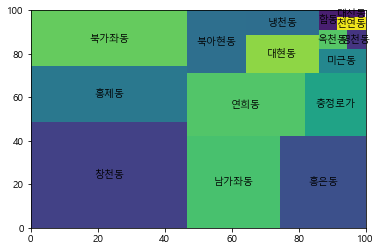

In [25]:
squarify.plot(ck_cnt,label = ck_cnt.index)